In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
log_file = 'data/finetune_classif/20170512-224400-216042.log'

In [5]:
loss_int = None
batches_per_epoch = None
values = []
with open(log_file) as f:
    count = 0
    for line in f:
        s = line.split(':')
        if len(s) < 2:
            continue
        if len(s[0]) < 4 or s[0][-4:] != 'loss':
            continue
        if loss_int is None or batches_per_epoch is None:
            if '[' not in s[0] or ']' not in s[0]:
                continue
            i1, i2 = s[0].index('['), s[0].index(']')
            batch_str = s[0][i1+1:i2]
            int_val = int(batch_str.split(',')[-1].strip())
            if loss_int is None:  # update only at the first loss string encountered
                loss_int = int_val
            elif int_val == loss_int:
                batches_per_epoch = count
        values.append(float(s[1].strip()))
        count += 1
batch_values = range(0, loss_int * len(values), loss_int)

In [6]:
# see http://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def running_mean(l, N):
    sum = 0
    result = list( 0 for x in l)

    for i in range( 0, N ):
        sum = sum + l[i]
        result[i] = sum / (i+1)

    for i in range( N, len(l) ):
        sum = sum - l[i-N] + l[i]
        result[i] = sum / N

    return result

values_avg = running_mean(values, batches_per_epoch)

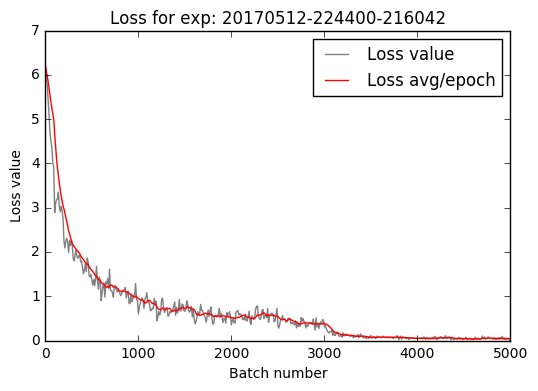

In [7]:
plt.figure()
plt.plot(batch_values, values, 'grey', label='Loss value')
plt.plot(batch_values, values_avg, 'r', label='Loss avg/epoch')
plt.legend()
plt.xlabel('Batch number')
plt.ylabel('Loss value')
plt.title('Loss for exp: ' + log_file.split('/')[-1].split('.')[0])
plt.show()